## package imports

In [83]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.integrate as integrate

## Data Import

We import the data of the MC simulations as numpy arrays for electron (ee), muonic (mm), hadronic (qq) and tauonic (tt) events. The relevant branches are the amount of charged paths (Ncharge), the skalar sum of all momenta of said charge tracks (Pcharge), the total energy deposited in the electromagnetic calorimeter (E_cal) and in hadronic calorimeter (E_hcal). The other 5 branches are irrelevant for this step of the analysis.

In [47]:
path_data="mc_z0experiment-main/"

ee_file = uproot.open(path_data+'ee.root')
ee_ttree_name = 'myTTree'
ee_branches = ee_file[ee_ttree_name].arrays()
ee_ctrk = ak.to_numpy(ee_branches.Ncharged)
ee_sump = ak.to_numpy(ee_branches.Pcharged)
ee_ecal = ak.to_numpy(ee_branches.E_ecal)
ee_hcal = ak.to_numpy(ee_branches.E_hcal)

mm_file = uproot.open(path_data+'mm.root')
mm_ttree_name = 'myTTree'
mm_branches = mm_file[mm_ttree_name].arrays()
mm_ctrk = ak.to_numpy(mm_branches.Ncharged)
mm_sump = ak.to_numpy(mm_branches.Pcharged)
mm_ecal = ak.to_numpy(mm_branches.E_ecal)
mm_hcal = ak.to_numpy(mm_branches.E_hcal)

qq_file = uproot.open(path_data+'qq.root')
qq_ttree_name = 'myTTree'
qq_branches = qq_file[qq_ttree_name].arrays()
qq_ctrk = ak.to_numpy(qq_branches.Ncharged)
qq_sump = ak.to_numpy(qq_branches.Pcharged)
qq_ecal = ak.to_numpy(qq_branches.E_ecal)
qq_hcal = ak.to_numpy(qq_branches.E_hcal)

tt_file = uproot.open(path_data+'tt.root')
tt_ttree_name = 'myTTree'
tt_branches = tt_file[tt_ttree_name].arrays()
tt_ctrk = ak.to_numpy(tt_branches.Ncharged)
tt_sump = ak.to_numpy(tt_branches.Pcharged)
tt_ecal = ak.to_numpy(tt_branches.E_ecal)
tt_hcal = ak.to_numpy(tt_branches.E_hcal)

We import the data of the opal measurements

In [48]:
path_data="data_z0experiment-main/data/daten_1.root"
file = uproot.open(path_data)
ttree = 'myTTree'
data_branches = file[ttree].arrays()
#ee_ctrk = ak.to_numpy(ee_branches.Ncharged)
#file[ttree].keys()

data_ctrk = ak.to_numpy(data_branches.Ncharged)
data_sump = ak.to_numpy(data_branches.Pcharged)
data_ecal = ak.to_numpy(data_branches.E_ecal)
data_hcal = ak.to_numpy(data_branches.E_hcal)
data_cos = ak.to_numpy(data_branches.cos_thet)
data_elep = ak.to_numpy(data_branches.E_lep)

## Histograms MC data

Now plot the data in ATLAS histograms. Each histogram shows the number of events over the branch/property the for all channels, which are marked with different colours. These histograms were used to find the cuts.

Finding the cuts was a mixture of analyzing individual diagrams for good cuts and adjusting the cuts to optimize the effiency after the effiency matrix was calculated. Most of the time the cuts were initially set to exclude as little as possible events, but no exact value was choosen.

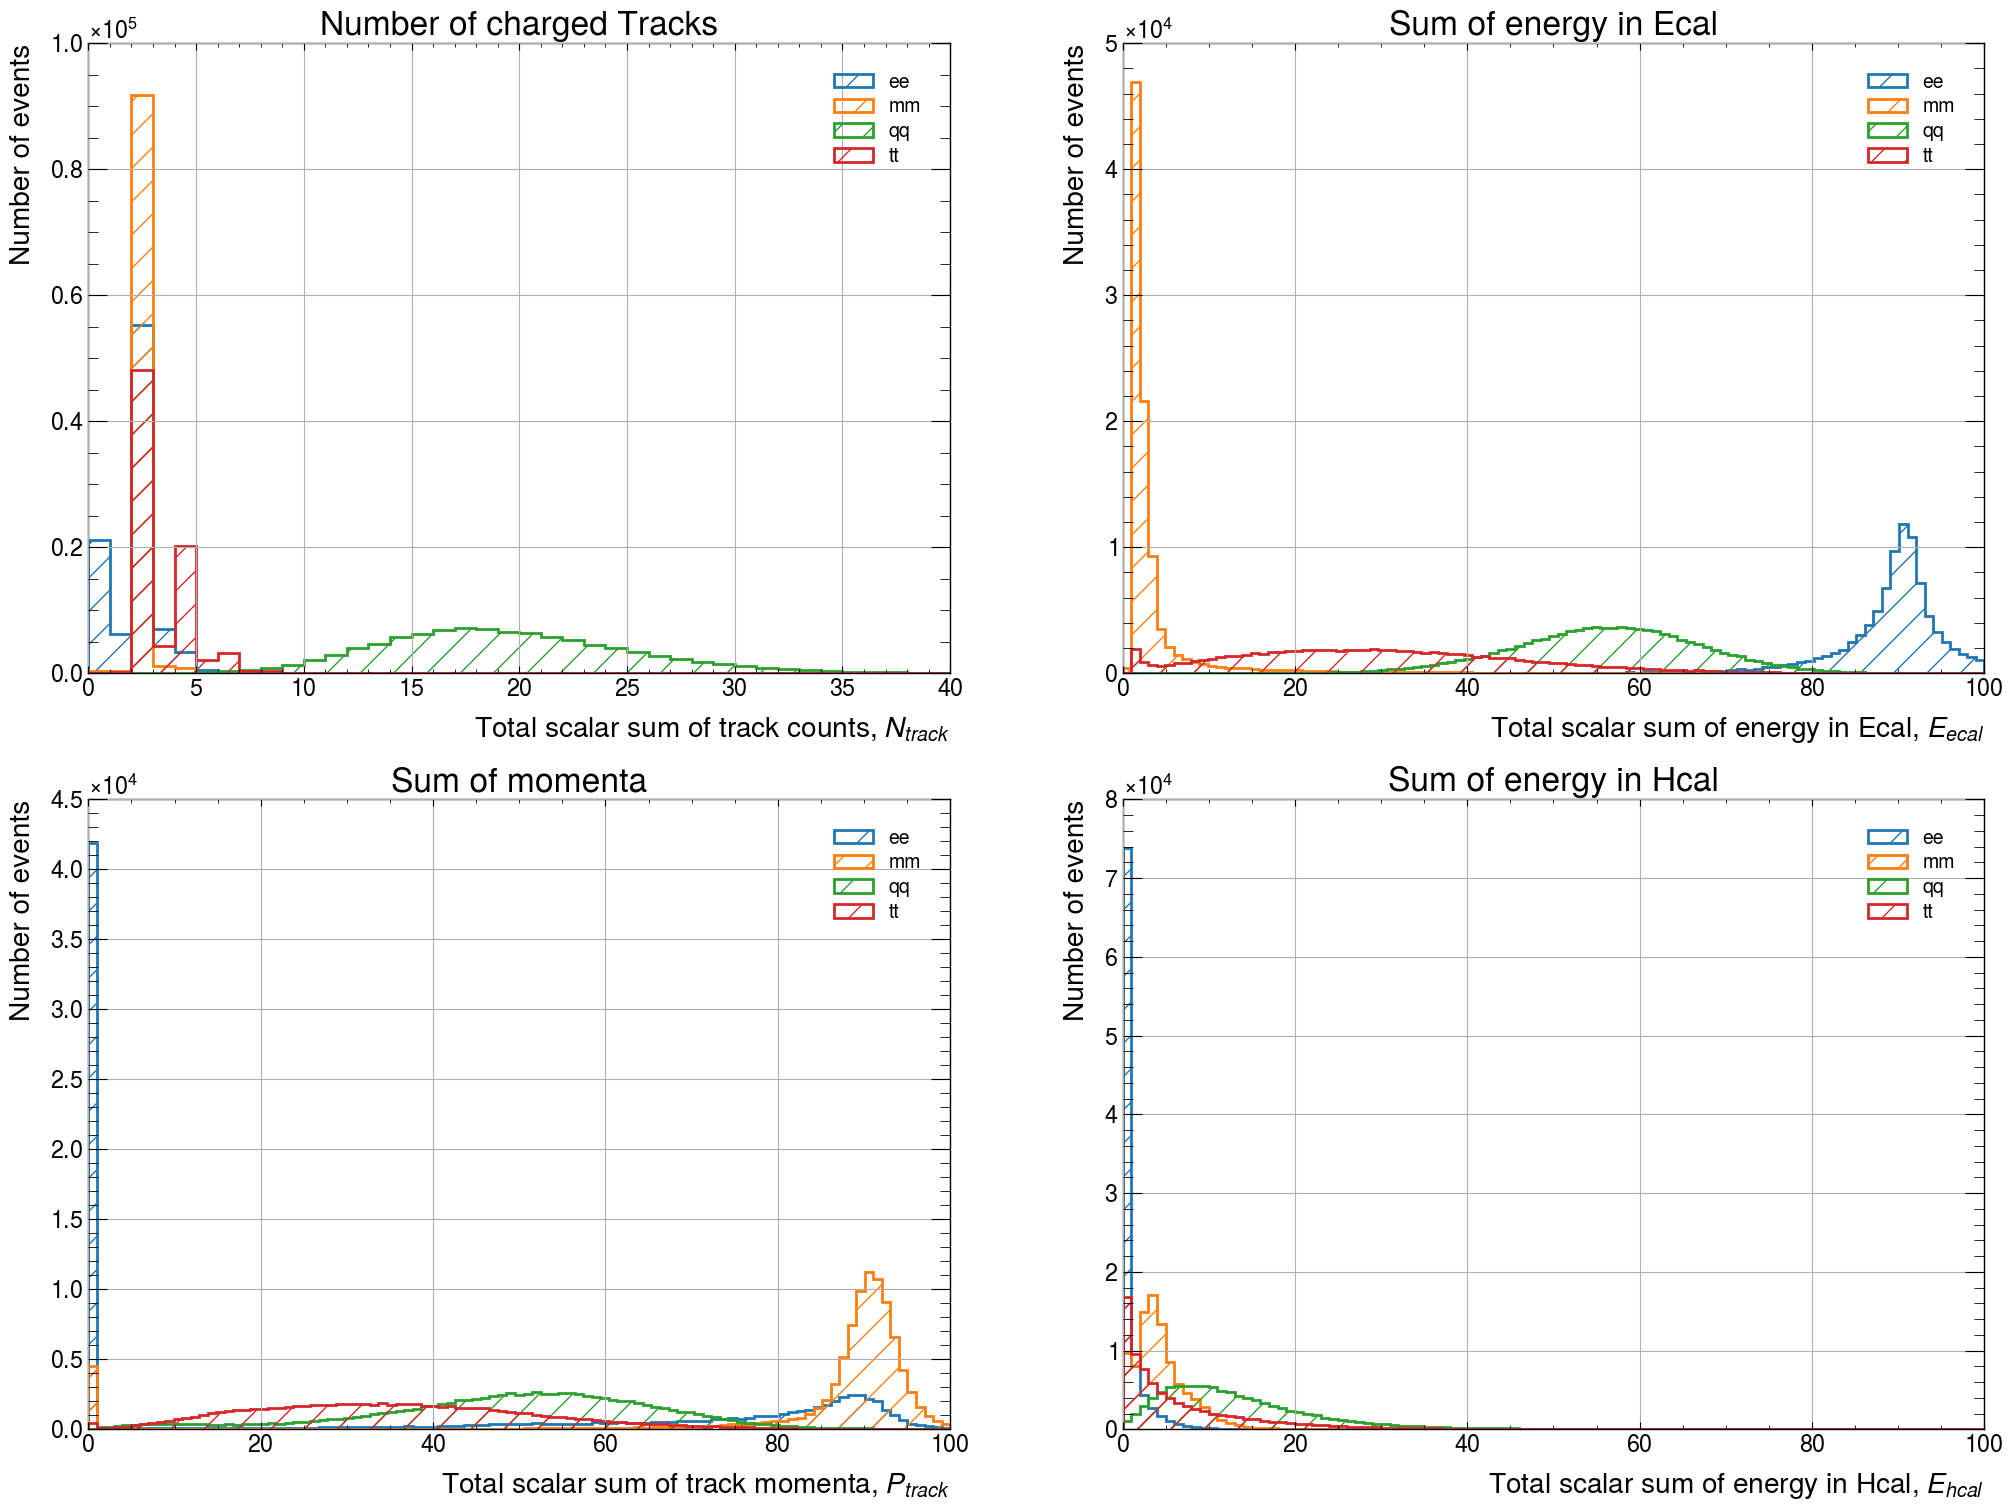

In [49]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(24, 18))

plt.subplot(221)

bins1 = np.linspace(0,40,41)
plt.hist(ee_ctrk,bins=bins1, histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_ctrk,bins=bins1, histtype='step',  linewidth=2,  hatch='/', label='tt')
plt.title('Number of charged Tracks')
plt.xlabel('Total scalar sum of track counts, $N_{track}$')
plt.ylabel('Number of events')
plt.legend()
plt.grid()

plt.subplot(223)

plt.hist(ee_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_sump,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='tt')
plt.title('Sum of momenta')
plt.xlabel('Total scalar sum of track momenta, $P_{track}$')
plt.ylabel('Number of events')
plt.legend()
plt.grid()

plt.subplot(222)

plt.hist(ee_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_ecal,bins=101,range=(0.,100.), histtype='step',  linewidth=2,  hatch='/', label='tt')
plt.title('Sum of energy in Ecal')
plt.xlabel('Total scalar sum of energy in Ecal, $E_{ecal}$')
plt.ylabel('Number of events')
plt.legend()
plt.grid()

plt.subplot(224)

bins4 = np.linspace(0,100,101)
plt.hist(ee_hcal,bins=bins4, histtype='step',  linewidth=2, hatch='/', label='ee')
plt.hist(mm_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='mm')
plt.hist(qq_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='qq')
plt.hist(tt_hcal,bins=bins4, histtype='step',  linewidth=2,  hatch='/', label='tt')
plt.title('Sum of energy in Hcal')
plt.xlabel('Total scalar sum of energy in Hcal, $E_{hcal}$')
plt.ylabel('Number of events')
plt.legend()
plt.grid()


## Histograms opal data

Now plot the opal data in ATLAS histograms. Each histogram shows the number of events over the branch/property

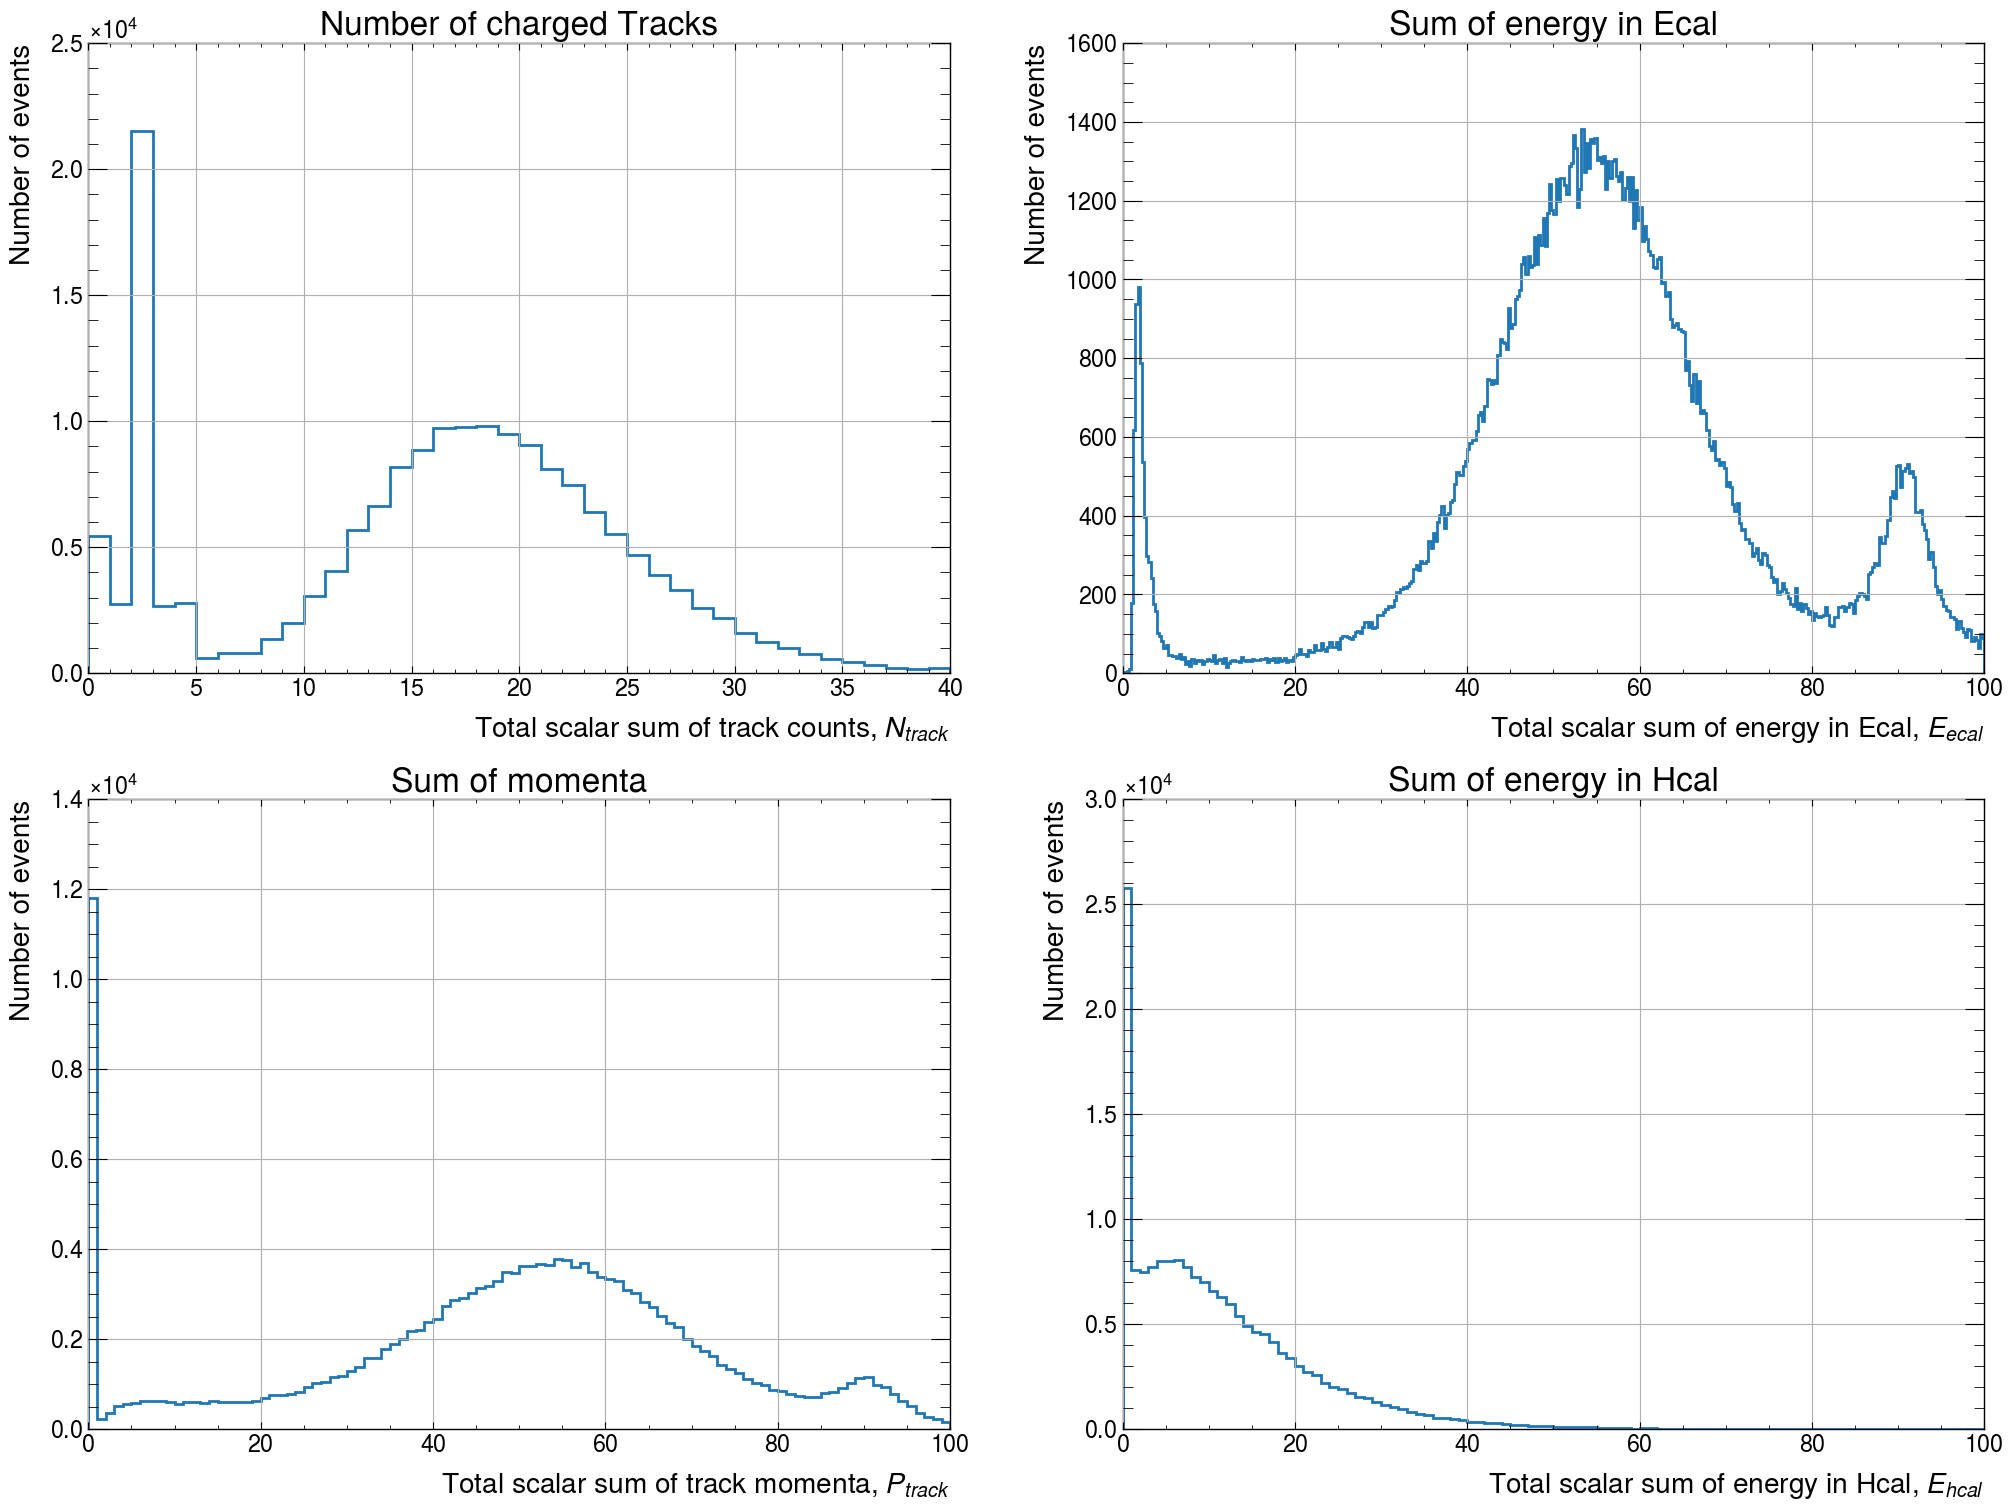

In [50]:
bins1 = np.linspace(0,40,41)
bins2 = np.linspace(0,100,401)
bins3 = np.linspace(0,100,101)
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(24, 18))

plt.subplot(221)
plt.hist(data_ctrk,bins=bins1, histtype='step',  linewidth=2)
plt.title('Number of charged Tracks')
#plt.xlim(0,10)
plt.xlabel('Total scalar sum of track counts, $N_{track}$')
plt.ylabel('Number of events')
plt.grid()

plt.subplot(223)
plt.hist(data_sump,bins=bins3, histtype='step',  linewidth=2)
plt.title('Sum of momenta')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of track momenta, $P_{track}$')
plt.ylabel('Number of events')
plt.grid()

plt.subplot(222)
plt.hist(data_ecal,bins=bins2, histtype='step',  linewidth=2)
plt.title('Sum of energy in Ecal')
#plt.xlim(0,20)
plt.xlabel('Total scalar sum of energy in Ecal, $E_{ecal}$')
plt.ylabel('Number of events')
plt.grid()

plt.subplot(224)
plt.hist(data_hcal,bins=bins3, histtype='step',  linewidth=2)
plt.title('Sum of energy in Hcal')
#plt.xlim(0,2)
plt.xlabel('Total scalar sum of energy in Hcal, $E_{hcal}$')
plt.ylabel('Number of events')
plt.grid()


## Particle ID

A collection of several algorithms to do the particle ID. An overview:

- particleID: Identification of a single particle with all 4 properties. Retruns a list in which each entry is filled with an arbitrary number that indicates a score.
- arrayID: Executes particleID for an array of particles
- particle_ID_1234: Executes arrayID on a given particle array and allocate a particle ID (see below) according to the count numbers from arrayID. The return is either a explicite identification as one particle or a unknown return, if the particle could not be identified. 

For the identification in particleID, the individual properties of each event are compared to a set of intervals (cuts). If the property is inside the interval of a certain event type, the score of this event type is increased +1 times the weight of this property. Weights were choosen for each particle and property specific. In the end, particleID retuns a list which contains the scores for this particle for all possible event types.


The list of scores is employed in particle_ID_1234. The identification is here done with an majority vote. particle_ID_1234 compares all scores and picks the highest one. The event type corresponding to this score is then returned to be the event. For computation reasons, we use IDs:
- qq / Hadronic = 1
- ee = 2
- mm = 3
- tt = 4

The IDs correspond to the order in the scores list.

For example, particle A has score list of [5,1,1,0]. The score for ID=1, so for hadronic, is the highest with a score of 5 and therefore particle_ID_1234 will identify this event as a hadronic event. If this vote is ambiguites, the event is dismissed. The selection was therefore also tuned to minimise the amount of dismissed.

The weights open up another DoF for the selection. It was used to improve the identification in cases where the overlapp between different event types was very small to boost the accuracy of the selection. 

In [51]:
def particleID(ctrk,sump,ecal,hcal,details=False):
    had_count =0
    e_count = 0
    m_count = 0
    tau_count = 0
    
    if (8 <= ctrk <= 38): had_count += 1*3
    if (0 <= ctrk <= 4): e_count += 1
    if (2 <= ctrk <= 3): m_count += 1 * 2
    if (2 <= ctrk <= 7): tau_count += 1 * 2
        
    if (0 <= sump <= 80): had_count += 1
    if (0 <= sump <= 1) or (20 <= sump <= 1000): e_count += 1
    if (0 <= sump <= 1) or (70 <= sump <= 1000): m_count += 1 * 1.5
    if (5 <= sump <= 70): tau_count += 1 * 1.5
        
    if (20 <= ecal <= 90): had_count += 1 
    if (70 <= ecal <= 1000): e_count += 1 * 2
    if (1 <= ecal <= 11): m_count += 1
    if (11 <= ecal <= 75): tau_count += 1 
        
    if (3 <= hcal <= 50): had_count += 1
    if (0 <= hcal <= 7): e_count += 1
    if (0 <= hcal <= 14): m_count += 1
    if (0 <= hcal <= 35): tau_count += 1
        
    
    if details:
        print("Hadronic:",had_count,"Electron:",e_count,"Muon:",m_count,"Tau:",tau_count)
        
    return [had_count,e_count,m_count,tau_count]

def array_ID(ctrk,sump,ecal,hcal):
    
    result = []
    for i in range(0,len(ctrk)):
        result.append(particleID(ctrk[i],sump[i],ecal[i],hcal[i]))
    return result

In [52]:
def particle_ID_1234(ctrk,sump,ecal,hcal):
    namelist = []
    spare_list = []
    particle_list = array_ID(ctrk,sump,ecal,hcal)
    for particle in particle_list:
        name = []
        indices = [i for i, x in enumerate(particle) if x == max(particle)]
        if 0 in indices:
            name = 1
        if 1 in indices:
            name = 2
        if 2 in indices:
            name = 3
        if 3 in indices:
            name = 4
        if len(indices) != 1:
            name=0
            spare_list.append(np.array(indices)+1)
        namelist.append(name)
    return [namelist,spare_list]

## Efficency Matrix

This function eff() simply calculates the effiencies by summing up all identifications for one event type and returning their absolute numbers. This number is then divided by the total amount events registered for this event type to we gain a percentage. The Numbers behind the matrix are the percentage of events, that have been identified, and werent ambigouse.

In [53]:
def eff(id_array,Errorcounter=False):
    results = np.array([0,0,0,0])
    errors = 0
    for particle in id_array:
        if particle != 0:
            results[particle-1] += 1
        else:
            errors += 1
    
    if Errorcounter:
        print(errors)
    return results

            

In [54]:
id_ee = particle_ID_1234(ee_ctrk,ee_sump,ee_ecal,ee_hcal)[0]
id_qq = particle_ID_1234(qq_ctrk,qq_sump,qq_ecal,qq_hcal)[0]
id_mm = particle_ID_1234(mm_ctrk,mm_sump,mm_ecal,mm_hcal)[0]
id_tt = particle_ID_1234(tt_ctrk,tt_sump,tt_ecal,tt_hcal)[0]

In [84]:
qq_eff = eff(id_qq)
ee_eff = eff(id_ee)
mm_eff = eff(id_mm)
tt_eff = eff(id_tt)

print("   |     qq         |      ee      |      mm      |     tt        |    Events identification ratio  ")
print("qq |",qq_eff/len(id_qq),np.sum(qq_eff)/len(id_qq))
print("ee |",ee_eff/len(id_ee),np.sum(ee_eff)/len(id_ee))
print("mm |",mm_eff/len(id_mm),np.sum(mm_eff)/len(id_mm))
print("tt |",tt_eff/len(id_tt),np.sum(tt_eff)/len(id_tt))

mat = [qq_eff,ee_eff,mm_eff,tt_eff]

   |     qq         |      ee      |      mm      |     tt        |    Events identification ratio  
qq | [9.86881487e-01 1.11603746e-04 5.07289754e-05 1.12415409e-02] 0.9982853606322859
ee | [9.59467815e-05 9.70437731e-01 1.06500927e-02 1.80486557e-02] 0.9992324257478519
mm | [1.16548882e-04 1.37739587e-04 9.66614043e-01 3.30998824e-02] 0.9999682139413654
tt | [0.00806676 0.00409019 0.008193   0.97792057] 0.9982705077385311


Text(0.5, 1.0, 'efficence matrix')

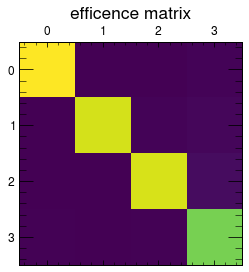

In [89]:

plt.matshow(mat)
plt.title('efficence matrix')

## Errors

The errors for the efficiencies are derived from a poisson distribution of each individual decision per channel. It standard deviation is $\sqrt(N)$ with $N$ being the counts. The errors on the individual matrix elements are then $\sigma_N = \sqrt{N/{N_{tot}}^{2}+N_{tot}N^{2}/{N_{tot}}^{4}}$ with $N_{tot}$ bein the toal amount of analyzed events for a certain data set.

In [59]:
var_qq = np.sqrt((np.sqrt(qq_eff)/len(id_qq))**2+(np.sqrt(len(id_qq))*qq_eff/len(id_qq)**2)**2)
var_ee = np.sqrt((np.sqrt(ee_eff)/len(id_ee))**2+(np.sqrt(len(id_ee))*ee_eff/len(id_qq)**2)**2)
var_mm = np.sqrt((np.sqrt(mm_eff)/len(id_mm))**2+(np.sqrt(len(id_mm))*mm_eff/len(id_qq)**2)**2)
var_tt = np.sqrt((np.sqrt(tt_eff)/len(id_tt))**2+(np.sqrt(len(id_tt))*tt_eff/len(id_qq)**2)**2)
mat_error=[var_qq,var_ee,var_mm,var_tt]

print("   |     qq         |      ee      |      mm      |     tt         ")
print("qq |",var_qq)
print("ee |",var_ee)
print("mm |",var_mm)
print("tt |",var_tt)

   |     qq         |      ee      |      mm      |     tt         
qq | [4.46027387e-03 3.36516731e-05 2.26872629e-05 3.39612305e-04]
ee | [3.19835191e-05 4.31063693e-03 3.38422751e-04 4.41883609e-04]
mm | [3.51425317e-05 3.82043001e-05 4.30872185e-03 6.00387342e-04]
tt | [0.00031965 0.00022743 0.00032215 0.00416919]


# Exercise 2

We first imported bot angles, but only the angle between an incoming and ougoing particle with the same charge is relevant for this calculation.

In [64]:
ee_cos1 = ak.to_numpy(ee_branches.cos_thru)
ee_cos2 = ak.to_numpy(ee_branches.cos_thet)

This was to discuss the behavior of the $t$ and $s$ channels. According to QED, the $s$-channel is proportional to $(1+x^2)$ with $x=cos(\theta)$ and therefore dominates for large scattering angle or small $cos(\theta)$, and the $t$-channels with $(1-x)^{-2}$ dominates for small angles or large $cos(\theta)$.

We then employed curve_fit to fit the sum before mentioned dependencies with each one a amplitude as a degree of freedom. This is prooved to be enough DoF and is theoreticly enough, since the cross-section contians the only angle dependency of the event number and event rate. 

The used angle range is from $[-0.9,0.9]$ since our the ansatz does not work very well with the data close to $0^\circ$, due to the issue of the beam pipe being in the way of good measurements.

In [90]:
from scipy.optimize import curve_fit


Coefficience a - b: [111.1865185   12.58174787]
Var Matricies: [[ 1.10416806 -0.04941872]
 [-0.04941872  0.01001559]]


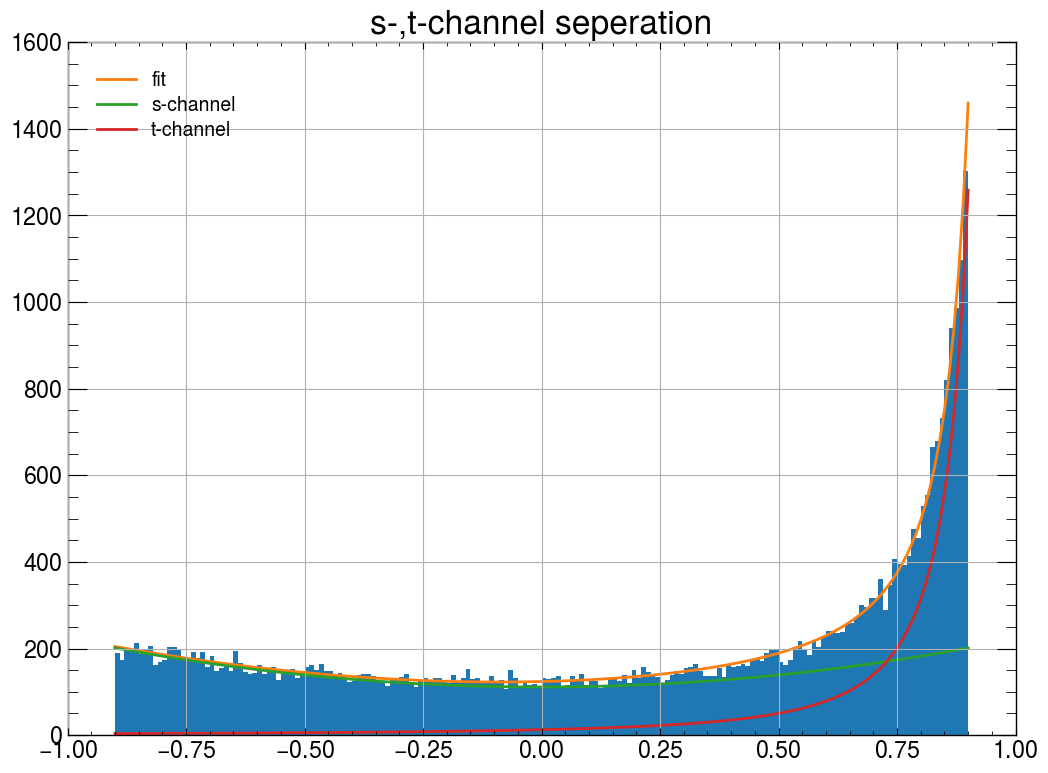

In [93]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(12,9))

def fits2(x,a,b):
    return a*(1+x**2) + b*(1-x)**(-2)

angles2 = np.linspace(-0.9,0.9,181)
new_bin_content2, new_bin_edges2,_ =plt.hist(ee_cos2,angles2)
new_mid2 = 0.5*(new_bin_edges2[1:] + new_bin_edges2[:-1])


coeff2, var_matrix2 = curve_fit(fits2, new_mid2, new_bin_content2)

print("Coefficience a - b:",coeff2)
print("Var Matricies:",var_matrix2)

plt.plot(angles2,fits2(angles2,*coeff2),label="fit")
plt.plot(angles2,coeff2[0]*(1+angles2**2),label="s-channel")
plt.plot(angles2,coeff2[1]*(1-angles2)**(-2),label="t-channel")
plt.title('s-,t-channel seperation')
plt.legend()
plt.grid()

looking where the s channel is dominant

In [73]:
def s2(x):
    return 114.70559483*(1+x**2)  -4.42888827
def t2(x):
    return 12.55065463*(1-x)**(-2) -4.42888827

for i in range(0,10):
    x = i/10 - 0.5
    if t2(x)/s2(x)<0.1:
        print(x)
    

-0.5
-0.4
-0.3
-0.2
-0.09999999999999998
0.0
0.09999999999999998


determine the areas

In [75]:
total_area_s = integrate.quad(s2,-1,1)[0]
part_area_s = integrate.quad(s2,-0.9,0.1)[0]

print("Ratio of total area to partial area:", total_area_s/part_area_s)

Ratio of total area to partial area: 2.149412011969677


calculate ratio and error of the ratio

In [76]:
error_fit_a = var_matrix2[0,0]/coeff2[0]
error_total_area = (s2(-1)+s2(1))*error_fit_a
error_part_area = (s2(-0.9)+s2(0.1))*error_fit_a
error_ratio = np.sqrt((1/part_area_s*error_total_area)**2 + (total_area_s/part_area_s**2)**2)
print("Total area",total_area_s,"+-",error_total_area,"ABS")
print("Parital area",part_area_s,"+-",error_part_area,"ABS")
print("Ratio:",total_area_s/part_area_s,"+-",error_ratio)

Total area 297.02380967333335 +- 4.46849626675892 ABS
Parital area 138.18840130196668 +- 3.1243403208315703 ABS
Ratio: 2.149412011969677 +- 0.03588268920675744


Cheaking if numbers with no angle in MC are higher than t channel at $cos(\theta)=0.99$


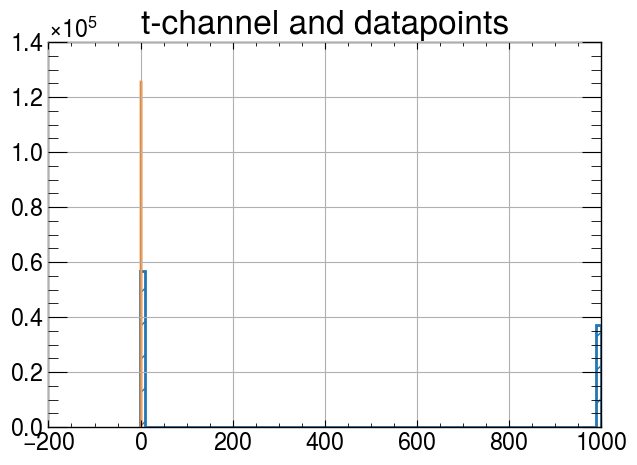

In [97]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))
angles3 = np.linspace(0,0.99,181)
plt.title('t-channel and datapoints')
plt.hist(ee_cos2,bins=101, histtype='step',  linewidth=2,  hatch='/', label='incoming and outgoing')
plt.plot(angles3,t2(angles3),label="t-channel")
plt.grid()